In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/wangyiming2022/Desktop/concatenated_dataset.csv')
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2019010128300,2019,10128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,5,1,1,1,0,0,1,3,2,E01004762
1,2019010152270,2019,10152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,...,9,4,1,1,0,0,1,3,2,E01003117
2,2019010155191,2019,10155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000943
3,2019010155192,2019,10155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,...,0,4,1,1,0,0,1,1,2,E01000973
4,2019010155194,2019,10155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000546


In [4]:
# Count the number of accidents per year
accidents_2019 = df.loc[df['accident_year'] == 2019].shape[0]
accidents_2020 = df.loc[df['accident_year'] == 2020].shape[0]
accidents_2021 = df.loc[df['accident_year'] == 2021].shape[0]

In [5]:
# Print out the results
print(f"Number of accidents in 2019: {accidents_2019}")
print(f"Number of accidents in 2020: {accidents_2020}")
print(f"Number of accidents in 2021: {accidents_2021}")

Number of accidents in 2019: 117536
Number of accidents in 2020: 91199
Number of accidents in 2021: 101087


In [6]:
# Predict the number of accidents in 2022
avg_annual_change = (accidents_2021 - accidents_2019) / 2
predicted_accidents_2022 = accidents_2021 + avg_annual_change
print(f"Predicted number of accidents in 2022: {int(predicted_accidents_2022)}")

Predicted number of accidents in 2022: 92862


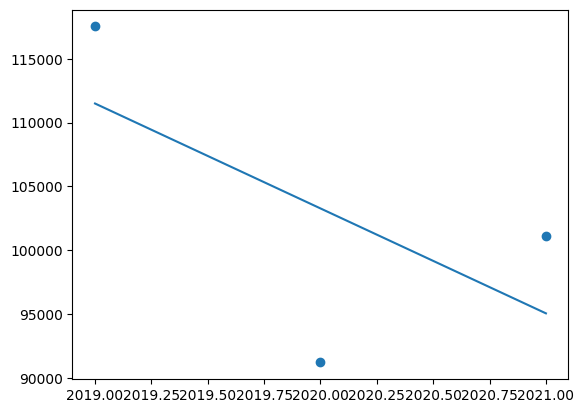

In [7]:
x = [2019, 2020, 2021]
y = [117536, 91199, 101087]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [8]:
# Coefficient of correlation
print(r)

-0.618197180066088


In [9]:
predicted_accidents_2022 = myfunc(2022)
print(predicted_accidents_2022)

86825.0


----------------

In [10]:
print(df.corr())

                                             accident_year  \
accident_year                                     1.000000   
location_easting_osgr                             0.013761   
location_northing_osgr                           -0.012855   
longitude                                         0.014084   
latitude                                         -0.012795   
police_force                                     -0.020191   
accident_severity                                -0.014731   
number_of_vehicles                                0.001868   
number_of_casualties                             -0.021066   
day_of_week                                       0.005948   
local_authority_district                         -0.520675   
first_road_class                                  0.003925   
first_road_number                                 0.001119   
road_type                                         0.011014   
speed_limit                                      -0.023157   
junction

In [12]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find the correlations >= 0.6
corr_subset = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_subset = corr_subset.stack().reset_index()
corr_subset.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_subset = corr_subset[corr_subset['Correlation'] >= 0.6]

# Print the results
print(corr_subset)

                 Variable 1                Variable 2  Correlation
29    location_easting_osgr                 longitude     0.999452
56   location_northing_osgr                  latitude     0.999969
134            police_force  local_authority_district     0.659793
312             speed_limit       urban_or_rural_area     0.669691
328        junction_control         second_road_class     0.880825


In [17]:
# Prepare the input data
X = df[['second_road_class']]
y = df['junction_control']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

R-squared score: 0.78


In [18]:
print(model.predict([[3]])[0])

1.8455342520973448


In [20]:
# Create a new DataFrame with the relevant columns
new_df = df[['accident_severity', 'number_of_vehicles', 'road_type']]

# Split the data into training and testing sets
X = new_df[['number_of_vehicles', 'road_type']]
y = new_df['accident_severity'].apply(lambda x: 1 if x >= 2 else 0)  # Convert to binary labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9855402243201807


In [22]:
print(model.predict([[2,9]]))

[1]
